### Student Information
Name:蔡昀陞

Student ID:109065538

GitHub ID:asd7845121

---

### Instructions

1. First: do the **take home** exercises in the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2020-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Oct. 22th 11:59 pm, Thursday)__. 

In [1]:
### Begin Assignment Here

# First Part

In [2]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

### ** >>> Exercise 1 (5 min): **  
In this exercise, please print out the *text* data for the first three samples in the dataset. (See the above code for help)

In [3]:
# Answer here
for i in range(3):
    print(twenty_train.data[i])

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.

From: ani@ms.uky.edu (Aniruddha B. Deglurkar)
Subject: help: Splitting a trimming region along a mesh 
Organization: University Of Kentucky, Dept. of Math Sciences
Lines: 28



	Hi,

	I have a problem, I hope some of the 'gurus' can help me solve.

	Background of the problem:
	I have a rectangular mesh in the uv

In [4]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
# add category to the dataframe
X['category'] = twenty_train.target
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [5]:

#Answer here
# 2way to select the top10 records of category 3
print(X[X["category"] == 3][:10])
print(X.query("(category == 3)")[:10])

                                                 text  category  \
2   From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3   From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4   From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5   From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6   From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
10  From: anasaz!karl@anasazi.com (Karl Dussik) Su...         3   
18  From: tom_milligan@rainbow.mentorg.com Subject...         3   
20  From: dotsonm@dmapub.dma.org (Mark Dotson) Sub...         3   
22  From: jkellett@netcom.com (Joe Kellett) Subjec...         3   
26  From: christian@geneva.rutgers.edu Subject: en...         3   

             category_name  
2   soc.religion.christian  
3   soc.religion.christian  
4   soc.religion.christian  
5   soc.religion.christian  
6   soc.religion.christian  
10  soc.religion.christian  
18  soc.religion.christian  
20  soc.religion.christian  
2

### ** >>> Exercise 3 (5 min): **  
Try to fecth records belonging to the ```comp.graphics``` category, and query every 10th record. Only show the first 5 records.

In [6]:
# Answer here
X[X['category_name']=='sci.med'].iloc[::10][:5]

text  category category_name
7    From: aldridge@netcom.com (Jacquelin Aldridge)...         2       sci.med
49   From: jimj@contractor.EBay.Sun.COM (Jim Jones)...         2       sci.med
82   From: jason@ab20.larc.nasa.gov (Jason Austin) ...         2       sci.med
118  From: rogers@calamari.hi.com (Andrew Rogers) S...         2       sci.med
142  From: lady@uhunix.uhcc.Hawaii.Edu (Lee Lady) S...         2       sci.med

### >>> **Exercise 4 (5 min):** 
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [7]:
# Answer here
X.isnull().apply(lambda x: dmh.check_missing_values(x),axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2252    (The amoung of missing records is: , 0)
2253    (The amoung of missing records is: , 0)
2254    (The amoung of missing records is: , 0)
2255    (The amoung of missing records is: , 0)
2256    (The amoung of missing records is: , 0)
Length: 2257, dtype: object

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [8]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [9]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [10]:
# Answer here
'''
Python's np.nan'stype is float
'NaN'/'None'/'' there type is all string
I think that's why they are not null
''' 
print("0：","\'np.nan\''",type(np.nan))
# print("",type())
print("2：","\'Nan\'",type("NaN"))
print("3：","\'None\'",type("None"))
print("4：","None",type(None))
print("5：","\'\'",type(""))

0： 'np.nan'' <class 'float'>
2： 'Nan' <class 'str'>
3： 'None' <class 'str'>
4： None <class 'NoneType'>
5： '' <class 'str'>


### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [11]:
X_sample = X.sample(n=1000) #random state
# Answer here
print(X[X["category"]==0].count()[1]/X.count()[1])
print(X[X["category"]==1].count()[1]/X.count()[1])
print(X[X["category"]==2].count()[1]/X.count()[1])
print(X[X["category"]==3].count()[1]/X.count()[1])

print(X_sample[X_sample["category"]==0].count()[1]/X_sample.count()[1])
print(X_sample[X_sample["category"]==1].count()[1]/X_sample.count()[1])
print(X_sample[X_sample["category"]==2].count()[1]/X_sample.count()[1])
print(X_sample[X_sample["category"]==3].count()[1]/X_sample.count()[1])

0.21267168808152415
0.25875055383252105
0.2631812140008861
0.2653965440850687
0.214
0.252
0.274
0.26


### >>> **Exercise 7 (5 min):**
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

sci.med                   274
soc.religion.christian    260
comp.graphics             252
alt.atheism               214
Name: category_name, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

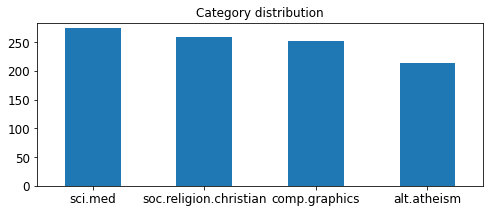

In [12]:
# Answer here

upper_bound = max(X_sample.category_name.value_counts()) + 10

print(X_sample.category_name.value_counts())

# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, upper_bound], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

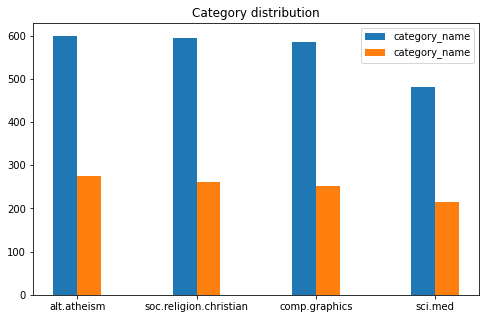

In [13]:
# Answer here

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.title("Category distribution")
plt.bar(categories,X["category_name"].value_counts(),bottom=None, align='edge',width=-0.2, label="category_name")
plt.bar(categories,X_sample["category_name"].value_counts(),bottom=None, align='edge',width=0.2, label="category_name")
plt.legend()
plt.show()

### **>>> Exercise 9 (5 min):**
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [14]:
import nltk
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)
analyze = count_vect.build_analyzer()
# Answer here
# X['text']
analyze(X['text'][0])

['from',
 'sd345',
 'city',
 'ac',
 'uk',
 'michael',
 'collier',
 'subject',
 'converting',
 'images',
 'to',
 'hp',
 'laserjet',
 'iii',
 'nntp',
 'posting',
 'host',
 'hampton',
 'organization',
 'the',
 'city',
 'university',
 'lines',
 '14',
 'does',
 'anyone',
 'know',
 'of',
 'good',
 'way',
 'standard',
 'pc',
 'application',
 'pd',
 'utility',
 'to',
 'convert',
 'tif',
 'img',
 'tga',
 'files',
 'into',
 'laserjet',
 'iii',
 'format',
 'we',
 'would',
 'also',
 'like',
 'to',
 'do',
 'the',
 'same',
 'converting',
 'to',
 'hpgl',
 'hp',
 'plotter',
 'files',
 'please',
 'email',
 'any',
 'response',
 'is',
 'this',
 'the',
 'correct',
 'group',
 'thanks',
 'in',
 'advance',
 'michael',
 'michael',
 'collier',
 'programmer',
 'the',
 'computer',
 'unit',
 'email',
 'collier',
 'uk',
 'ac',
 'city',
 'the',
 'city',
 'university',
 'tel',
 '071',
 '477',
 '8000',
 'x3769',
 'london',
 'fax',
 '071',
 '477',
 '8565',
 'ec1v',
 '0hb']

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [15]:
# Answer here
'''
first, get the fifth record
second, get the index which value is 1
    there is two index whose value is 1, which are 0, 37 respectively
last, get the feature's name
'''

X_counts_fifth = X_counts[4, 0:200].toarray()
itemindex = np.argwhere(X_counts_fifth == 1)
print(count_vect.get_feature_names()[itemindex[1][1]])

print(count_vect.transform(['01']).toarray()[0][itemindex[1][1]])

01
1


### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

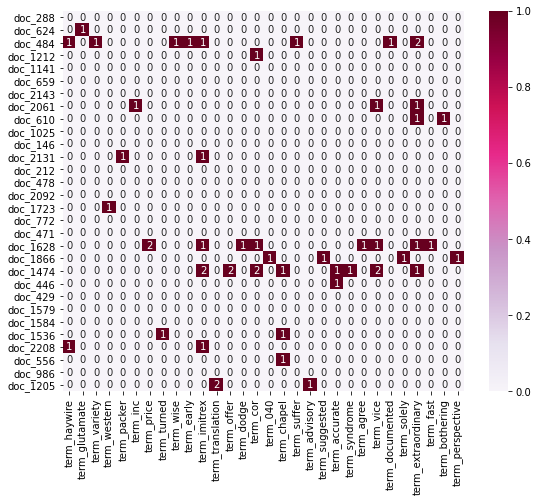

In [16]:
# Answer here
# Sample 30 documents and 30 term
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

X_sample_2 = X.sample(30)

count_sample_vect = CountVectorizer()
X_sample_2_counts = count_sample_vect.fit_transform(X_sample_2.text)

# import random  
from random import sample 
count_sample_name = sample(count_sample_vect.get_feature_names(), 30 )

plot_sample_x = ["term_"+str(i) for i in count_sample_name]
plot_sample_y = ["doc_"+ str(i) for i in list(X_sample_2.index)]
plot_sample_z = X_sample_2_counts[:30,:30].toarray()

df_todraw = pd.DataFrame(plot_sample_z, columns = plot_sample_x, index = plot_sample_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)


### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

(2257, 3)


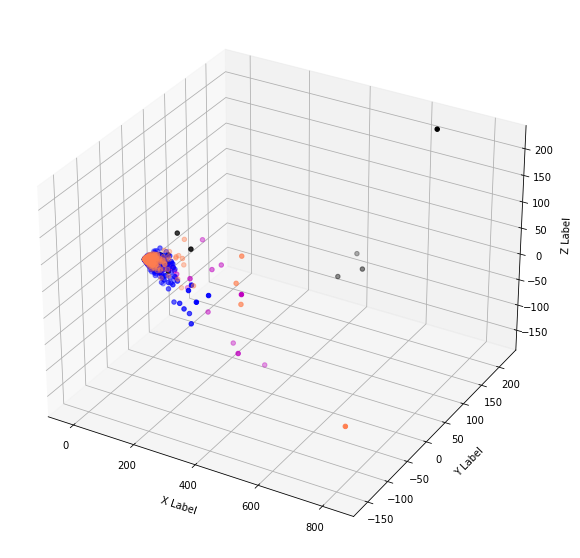

In [18]:
# Answer here
'''
No matter we use PCA to reduce the dimension to 2 or 3, the first 2 dimentions are similar (picture 3)
We have some different outlier
when we reduce the dimension to 2 or 3, we can't classify the different class easily.
'''

from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())


# picture 1
from mpl_toolkits.mplot3d import Axes3D

X_reduced_3D = PCA(n_components = 3).fit_transform(X_counts.toarray())
print(X_reduced_3D.shape)

col = ['coral', 'blue', 'black', 'm']
#設定圖示的大小
fig_3D = plt.figure(figsize=(25, 10)) 
# 111的意思是把畫布分為1行1列，畫在第一個方格內。其實就是整個畫布。
ax_3D = fig_3D.add_subplot(111, projection='3d') 

for c, category in zip(col, categories):
    xs = X_reduced_3D[X['category_name'] == category].T[0]
    ys = X_reduced_3D[X['category_name'] == category].T[1]
    zs = X_reduced_3D[X['category_name'] == category].T[2]
    ax_3D.scatter(xs, ys, zs, c = c, marker='o')
    
ax_3D.set_xlabel('\nX Label')
ax_3D.set_ylabel('\nY Label')
ax_3D.set_zlabel('\nZ Label')

plt.show()

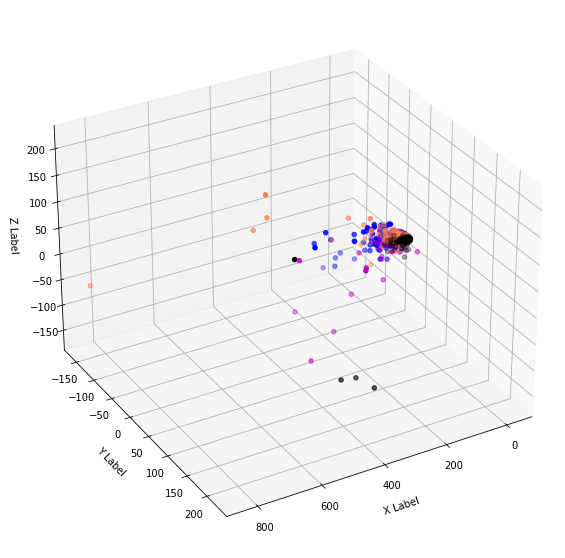

In [19]:
# picture 2 (elev=30,azim=60)

fig_3D = plt.figure(figsize=(25, 10)) 

ax_3D = fig_3D.add_subplot(111, projection='3d') 

for c, category in zip(col, categories):
    xs = X_reduced_3D[X['category_name'] == category].T[0]
    ys = X_reduced_3D[X['category_name'] == category].T[1]
    zs = X_reduced_3D[X['category_name'] == category].T[2]
    ax_3D.scatter(xs, ys, zs, c = c, marker='o')
    
ax_3D.set_xlabel('\nX Label')
ax_3D.set_ylabel('\nY Label')
ax_3D.set_zlabel('\nZ Label')

ax_3D.view_init(elev=30,azim=60)

plt.show()

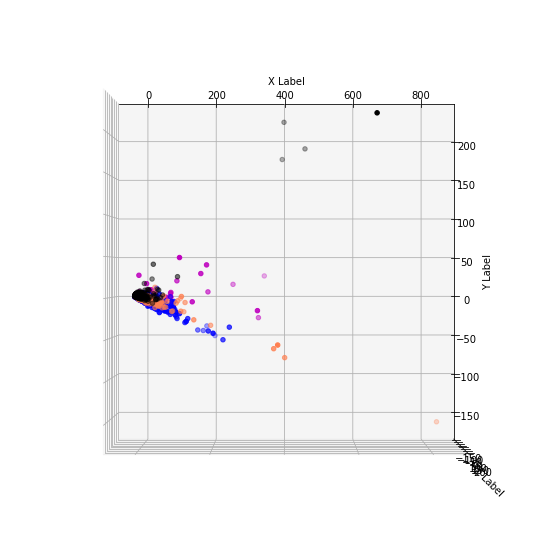

In [20]:
# picture 3 (elev=90,azim=270)

fig_3D = plt.figure(figsize=(25, 10)) 

ax_3D = fig_3D.add_subplot(111, projection='3d') 

for c, category in zip(col, categories):
    xs = X_reduced_3D[X['category_name'] == category].T[0]
    ys = X_reduced_3D[X['category_name'] == category].T[1]
    zs = X_reduced_3D[X['category_name'] == category].T[2]
    ax_3D.scatter(xs, ys, zs, c = c, marker='o')
    
ax_3D.set_xlabel('\nX Label')
ax_3D.set_ylabel('\nY Label')
ax_3D.set_zlabel('\nZ Label')

ax_3D.view_init(elev=90,azim=270)

plt.show()

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [21]:
# Answer here

# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

import plotly.graph_objects as go

x = ["term_"+str(i) for i in count_vect.get_feature_names()][:300]
y = term_frequencies[:300]
fig5 = go.Figure()
fig5.add_trace(go.Bar(x=x, y=y))
fig5.show()

### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 

In [22]:
# Answer here
# I use sample to reduce data size
import plotly.graph_objects as go

dict_xy = {"feature":["term_"+str(i) for i in count_vect.get_feature_names()],"frequencies":term_frequencies}
df_xy = pd.DataFrame(dict_xy)
df_xy_sample = df_xy.sample(300)

fig5 = go.Figure()
fig5.add_trace(go.Bar(x=df_xy_sample["feature"], y=df_xy_sample["frequencies"]))
fig5.show()

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [23]:
# Answer here
import plotly.graph_objects as go

dict_xy = {"feature":["term_"+str(i) for i in count_vect.get_feature_names()],"frequencies":term_frequencies}
df_xy = pd.DataFrame(dict_xy)
df_xy_sort = df_xy.sort_values(by="frequencies",ascending=False)

fig5 = go.Figure()
fig5.add_trace(go.Bar(x=df_xy_sort["feature"][:300], y=df_xy_sort["frequencies"][:300]))
fig5.show()

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [24]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

# Answer here
# Of course! 
mlb_name = preprocessing.LabelBinarizer()
mlb_name.fit(X.category_name)
mlb_name.classes_
X['bin_category_name'] = mlb_name.transform(X['category_name']).tolist()
X[0:9]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name                                           unigrams  \
0           comp.graphics  [From, :, sd345, @, city.ac.uk, (, Michael, Co...   
1           comp.graphics  [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....   
2  soc.religion.christian  [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...   
3  soc.religion.christian  [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...   
4  soc.religion.christian  [From, :, stanly, @, grok11.columbiasc.ncr.com...   
5  soc.religion.christian  [From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...   
6  soc.religion.christian  [From, :, jodfishe, @, silver.ucs.indiana.edu,...   
7                 sci.med  [From, :, aldridge, @, netcom.com, (, Jacqueli...   
8                 sci.med  [From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...   

  bin_category_name  
0      [0, 1, 0, 0]  
1      [0, 1, 0, 0]  
2      [0, 0, 0, 1]  
3      [0, 0, 0, 1]  
4      [0, 0, 0, 1]  
5      [0, 0, 0, 1]  
6      [0, 0, 0, 1]  
7      [0, 0, 1, 0]  
8      [0, 0, 1, 0]

# Second Part

## 2. Data Preparation

In [25]:
# Build the dataframe
import pandas as pd
with open('../sentiment labelled sentences/sentiment labelled sentences/amazon_cells_labelled.txt','r') as f:
    data_1 = f.read().splitlines()
with open('../sentiment labelled sentences/sentiment labelled sentences/imdb_labelled.txt','r',encoding="utf-8") as f:
    data_2 = f.read().splitlines()
with open('../sentiment labelled sentences/sentiment labelled sentences/yelp_labelled.txt','r') as f:
    data_3 = f.read().splitlines()
data = []
data.append(data_1)
data.append(data_2)
data.append(data_3)

## 3. Data Transformation

### 3.1 Converting Dictionary into Pandas Dataframe

In [26]:
column = ["text","score"]

df = pd.DataFrame(columns = column)
index = 0
for i in range(len(data)):
    for row in data[i]:
        try:
            row = row.split("\t")
            df.loc[index,"text"] = row[0]
            df.loc[index,"score"] = row[1]
            index+=1
        except:
            print("error fromat")
print(df[0:5])
print(len(df))


error fromat
error fromat
                                                text score
0  So there is no way for me to plug it in here i...     0
1                        Good case, Excellent value.     1
2                             Great for the jawbone.     1
3  Tied to charger for conversations lasting more...     0
4                                  The mic is great.     1
3000


## 4. Data Mining using Pandas

### 4.1 Missing Values

In [27]:
# check no missing values
import helpers.data_mining_helpers as dmh
df.isnull().apply(lambda x: dmh.check_missing_values(x),axis=0)

text                               score
0  The amoung of missing records is:   The amoung of missing records is: 
1                                   0                                   0

### 4.2 Dealing with Duplicate Data

In [28]:
# check no duplicated data
print("data length:",len(df))
print("duplicated data:",sum(df.duplicated()))

df.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe
print("data length:",len(df))


data length: 3000
duplicated data: 17
data length: 2966


## 5.  Data Preprocessing

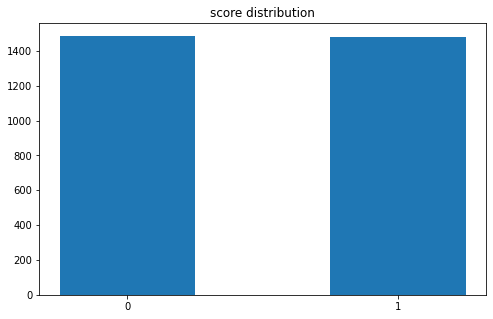

0    1486
1    1480
Name: score, dtype: int64


In [29]:
import matplotlib.pyplot as plt
categories = ["0","1"]
plt.figure(figsize=(8, 5))
plt.title("score distribution")
plt.bar(categories,df["score"].value_counts(),bottom=None, align='center',width=0.5)
plt.show()
print(df["score"].value_counts())

### 5.2 Feature Creation

In [30]:
import nltk
df['unigrams'] = df['text'].apply(lambda x: dmh.tokenize_text(x))
df[0:4]["unigrams"]

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

### 5.3 Feature subset selection

In [31]:
# add word frequency to data frame
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.text)

df['wordfreq'] = list(df_counts.toarray())

analyze = count_vect.build_analyzer()

df_counts.shape

(2966, 5153)

In [32]:
df

text score  \
0     So there is no way for me to plug it in here i...     0   
1                           Good case, Excellent value.     1   
2                                Great for the jawbone.     1   
3     Tied to charger for conversations lasting more...     0   
4                                     The mic is great.     1   
...                                                 ...   ...   
2995  I think food should have flavor and texture an...     0   
2996                           Appetite instantly gone.     0   
2997  Overall I was not impressed and would not go b...     0   
2998  The whole experience was underwhelming, and I ...     0   
2999  Then, as if I hadn't wasted enough of my life ...     0   

                                               unigrams  \
0     [So, there, is, no, way, for, me, to, plug, it...   
1                  [Good, case, ,, Excellent, value, .]   
2                         [Great, for, the, jawbone, .]   
3     [Tied, to, charger, for, conversations, lastin...   
4                              [The, mic, is, great, .]   
...                                                 ...   
2995  [I, think, food, should, have, flavor, and, te...   
2996                     [Appetite, instantly, gone, .]   
2997  [Overall, I, was, not, impressed, and, would, ...   
2998  [The, whole, experience, was, underwhelming, ,...   
2999  [Then, ,, as, if, I, had, n't, wasted, enough,...   

                                               wordfreq  
0     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
1     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
2     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
3     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
4     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
...                                                 ...  
2995  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
2996  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
2997  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
2998  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
2999  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  

[2966 rows x 4 columns]

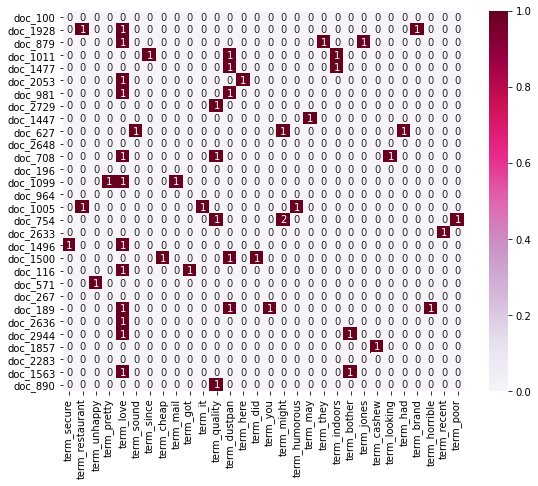

In [33]:
# plot
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

df_sample= df.sample(30)

count_sample_vect = CountVectorizer()
df_sample_counts = count_sample_vect.fit_transform(df_sample.text)

# import random  
from random import sample 
count_sample_name = sample(count_sample_vect.get_feature_names(), 30 )

plot_sample_x = ["term_"+str(i) for i in count_sample_name]
plot_sample_y = ["doc_"+ str(i) for i in list(df_sample.index)]
plot_sample_z = df_sample_counts[:30,:30].toarray()

df_todraw = pd.DataFrame(plot_sample_z, columns = plot_sample_x, index = plot_sample_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### 5.4 Dimensionality Reduction

In [35]:
# PCA
from sklearn.decomposition import PCA
df_reduced = PCA(n_components = 2).fit_transform(df_counts.toarray())
df_reduced.shape

(2966, 2)

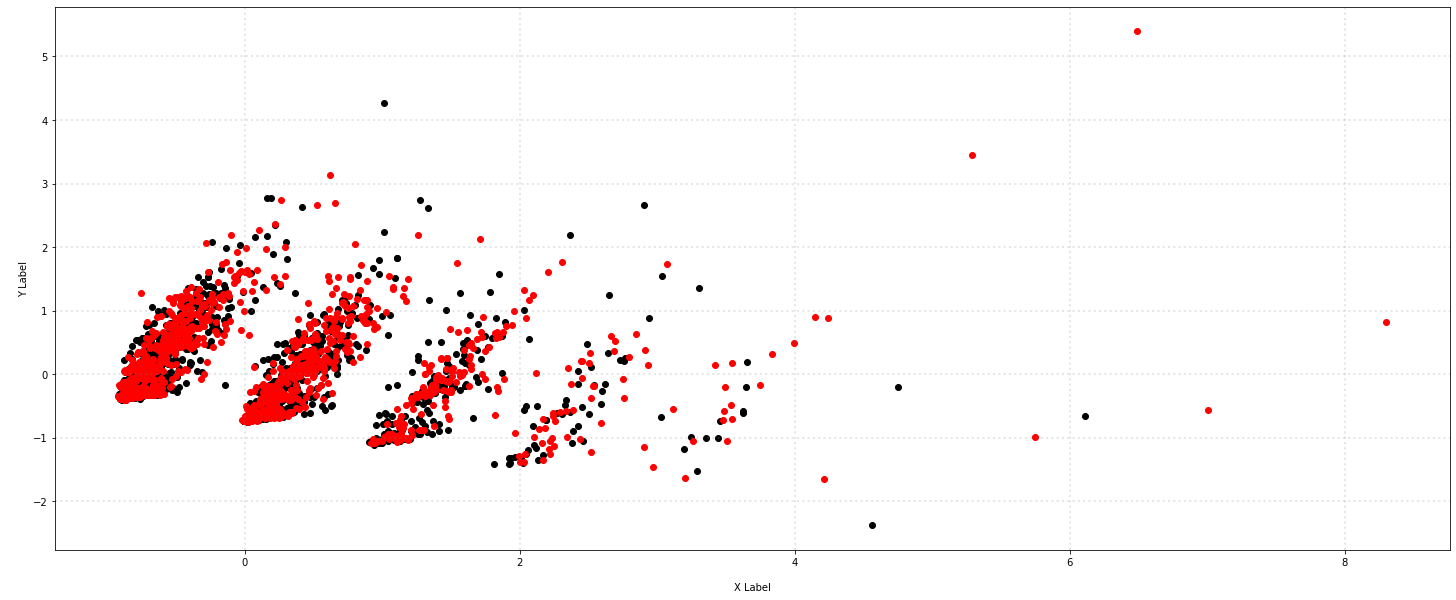

In [36]:
col = ['black', 'red']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = df_reduced[df['score'] == category].T[0]
    ys = df_reduced[df['score'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
plt.show()

### 5.5 Atrribute Transformation / Aggregation

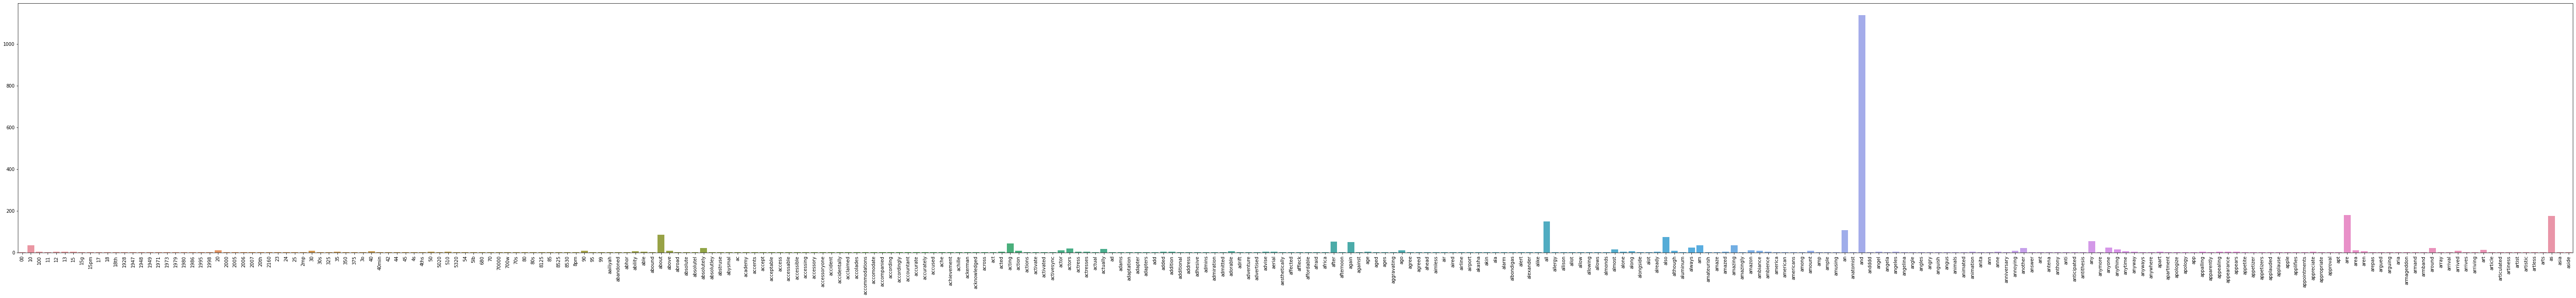

In [37]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
import numpy as np
term_frequencies = []
for j in range(0,df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

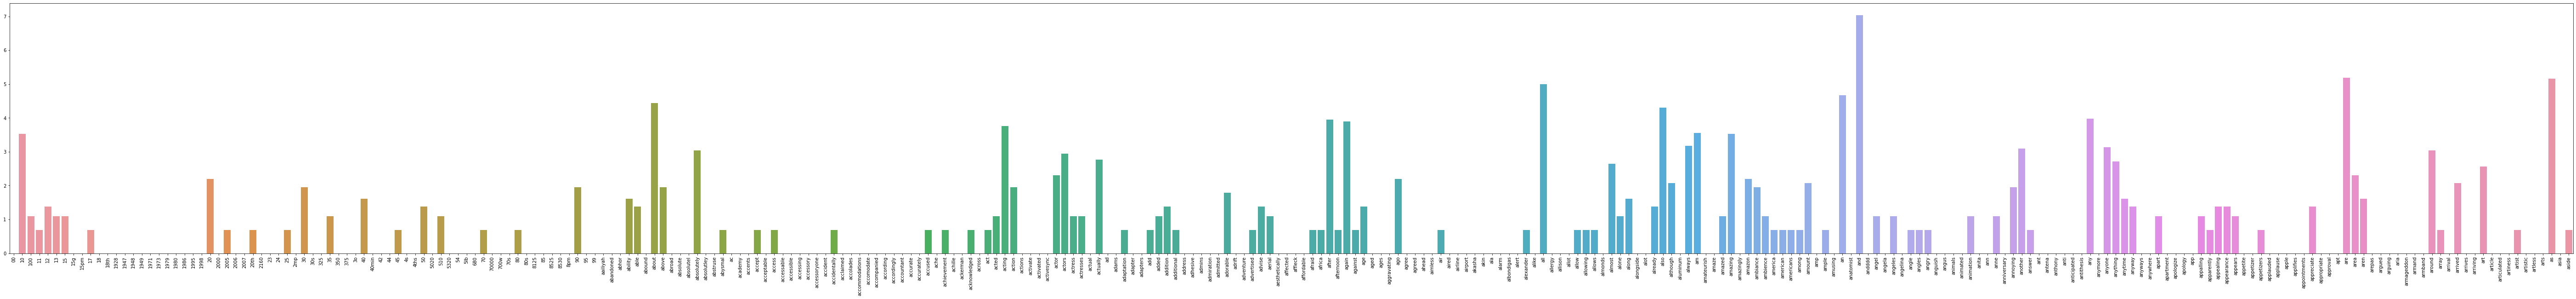

In [38]:
# use log to see the clearly result
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [39]:
import plotly.graph_objects as go

x = ["term_"+str(i) for i in count_vect.get_feature_names()][:300]
y = term_frequencies[:300]
fig5 = go.Figure()
fig5.add_trace(go.Bar(x=x, y=y))
fig5.show()

In [40]:
import plotly.graph_objects as go

dict_xy = {"feature":["term_"+str(i) for i in count_vect.get_feature_names()],"frequencies":term_frequencies}
df_xy = pd.DataFrame(dict_xy)
df_xy_sort = df_xy.sort_values(by="frequencies",ascending=False)

fig5 = go.Figure()
fig5.add_trace(go.Bar(x=df_xy_sort["feature"][:300], y=df_xy_sort["frequencies"][:300]))
fig5.show()

### 5.6 Discretization and Binarization

In [41]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(df.score)
print(mlb.classes_)
label = mlb.transform(df['score'])
df['bin_score'] = np.hstack((1 - label, label)).tolist()
df[0:9]

['0' '1']


text score  \
0  So there is no way for me to plug it in here i...     0   
1                        Good case, Excellent value.     1   
2                             Great for the jawbone.     1   
3  Tied to charger for conversations lasting more...     0   
4                                  The mic is great.     1   
5  I have to jiggle the plug to get it to line up...     0   
6  If you have several dozen or several hundred c...     0   
7        If you are Razr owner...you must have this!     1   
8                Needless to say, I wasted my money.     0   

                                            unigrams  \
0  [So, there, is, no, way, for, me, to, plug, it...   
1               [Good, case, ,, Excellent, value, .]   
2                      [Great, for, the, jawbone, .]   
3  [Tied, to, charger, for, conversations, lastin...   
4                           [The, mic, is, great, .]   
5  [I, have, to, jiggle, the, plug, to, get, it, ...   
6  [If, you, have, several, dozen, or, several, h...   
7  [If, you, are, Razr, owner, ..., you, must, ha...   
8    [Needless, to, say, ,, I, wasted, my, money, .]   

                                            wordfreq bin_score  
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...    [1, 0]  
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...    [0, 1]  
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...    [0, 1]  
3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...    [1, 0]  
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...    [0, 1]  
5  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...    [1, 0]  
6  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...    [1, 0]  
7  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...    [0, 1]  
8  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...    [1, 0]

# 6. Data Exploration

In [42]:
# We retrieve 2 sentences for a random record, here, indexed at 50 and 100
document_to_transform_1 = []
random_record_1 = df.iloc[50]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = df.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = df.iloc[150]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000


# Third Part

### New Data Visualization

In [44]:
# 3D plot of PCA
# it is like the 2D PCA plot in some angle 
import plotly.express as px
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)
components = pca.fit_transform(df_counts.toarray())

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=df['score'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},
)
fig.show()

In [45]:
'''
I use the document and word frequency to plot on the figure
x is the document id
y is the specific word frequency in every document
for example, I count the frequency "the" and "is"'s frequency in every document
We can see the specific word's frequency in every document
'''

sample_amount = 300

df_sample = df.sample(sample_amount,random_state=0)

count_sample_vect = CountVectorizer()
df_sample_counts = count_sample_vect.fit_transform(df_sample.text)

df_coo = df_sample_counts.tocoo()

con_np = np.column_stack((df_coo.row, df_coo.col, df_coo.data))

# ####### # "the" counts in document
listX1 = []
listy1 = []

listXy1 = [[] for _ in range(sample_amount)]

print(count_sample_vect.get_feature_names()[1039], " = ", 1039)


for i in range(len(con_np)):
    listXy1[con_np[i][0]].append([[con_np[i][1], con_np[i][2]]])

for i in range(len(listXy1)):
    listX1.append("doc_"+ str(i))
    haveWord = False
    ind = 0
    for j in range(len(listXy1[i])):
        if (listXy1[i][j][0][0] == 1039):
            
            haveWord = True
            ind = j
    if(haveWord == True):
        listy1.append(listXy1[i][ind][0][1])
    else:
        listy1.append(0)


# ####### # "the" counts in document
listX2 = []
listy2 = []

listXy2 = [[] for _ in range(sample_amount)]

print(count_sample_vect.get_feature_names()[559], " = ", 559)


for i in range(len(con_np)):
    listXy2[con_np[i][0]].append([[con_np[i][1], con_np[i][2]]])

for i in range(len(listXy2)):
    listX2.append("doc_"+ str(i))
    haveWord = False
    ind = 0
    for j in range(len(listXy2[i])):
        if (listXy2[i][j][0][0] == 559):
            
            haveWord = True
            ind = j
    if(haveWord == True):
        listy2.append(listXy2[i][ind][0][1])
    else:
        listy2.append(0)
        
import plotly.graph_objects as go

fig5 = go.Figure()
fig5.add_trace(go.Bar(x=listX1, y=listy1, name='the', marker_color='rgb(55, 83, 109)'))
fig5.add_trace(go.Bar(x=listX2, y=listy2, name='is', marker_color='lightsalmon'))

fig5.show()

the  =  1039
is  =  559


### TF-IDF Feature

In [46]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=1)
df_ti_counts = vectorizer.fit_transform(df.text)
vectorizer.get_feature_names()

# add tfidf to data frame
tfidf = vectorizer.fit_transform(df['text']).toarray()
df['tfidf']=list(tfidf)
print(tfidf.shape)

(2966, 5153)


In [47]:
df

text score  \
0     So there is no way for me to plug it in here i...     0   
1                           Good case, Excellent value.     1   
2                                Great for the jawbone.     1   
3     Tied to charger for conversations lasting more...     0   
4                                     The mic is great.     1   
...                                                 ...   ...   
2995  I think food should have flavor and texture an...     0   
2996                           Appetite instantly gone.     0   
2997  Overall I was not impressed and would not go b...     0   
2998  The whole experience was underwhelming, and I ...     0   
2999  Then, as if I hadn't wasted enough of my life ...     0   

                                               unigrams  \
0     [So, there, is, no, way, for, me, to, plug, it...   
1                  [Good, case, ,, Excellent, value, .]   
2                         [Great, for, the, jawbone, .]   
3     [Tied, to, charger, for, conversations, lastin...   
4                              [The, mic, is, great, .]   
...                                                 ...   
2995  [I, think, food, should, have, flavor, and, te...   
2996                     [Appetite, instantly, gone, .]   
2997  [Overall, I, was, not, impressed, and, would, ...   
2998  [The, whole, experience, was, underwhelming, ,...   
2999  [Then, ,, as, if, I, had, n't, wasted, enough,...   

                                               wordfreq bin_score  \
0     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...    [1, 0]   
1     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...    [0, 1]   
2     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...    [0, 1]   
3     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...    [1, 0]   
4     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...    [0, 1]   
...                                                 ...       ...   
2995  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...    [1, 0]   
2996  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...    [1, 0]   
2997  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...    [1, 0]   
2998  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...    [1, 0]   
2999  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...    [1, 0]   

                                                  tfidf  
0     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
1     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
2     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
3     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
4     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
...                                                 ...  
2995  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
2996  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
2997  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
2998  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
2999  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  

[2966 rows x 6 columns]

### Naive Bayes classifier for word frequency

In [48]:
# naive bayes with word frequency
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
model = GaussianNB()
X = df['wordfreq']
y = df['score']

le = preprocessing.LabelEncoder()
Y_class_label = le.fit_transform(y)
features = list(X)

model.fit(features, Y_class_label)
expected = Y_class_label
predicted = model.predict(features)
from sklearn import metrics
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1486
           1       1.00      0.73      0.84      1480

    accuracy                           0.87      2966
   macro avg       0.89      0.87      0.86      2966
weighted avg       0.89      0.87      0.86      2966

[[1484    2]
 [ 396 1084]]


### Naive Bayes classifier for word frequency

In [49]:
# naive bayes with TF-IDF

model = GaussianNB()
X = df['tfidf']
y = df['score']

le = preprocessing.LabelEncoder()
Y_class_label = le.fit_transform(y)
features = list(X)

model.fit(features, Y_class_label)
expected = Y_class_label
predicted = model.predict(features)
from sklearn import metrics
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93      1486
           1       1.00      0.84      0.91      1480

    accuracy                           0.92      2966
   macro avg       0.93      0.92      0.92      2966
weighted avg       0.93      0.92      0.92      2966

[[1485    1]
 [ 233 1247]]


# Fourth Part

## inefficent / meaningful part

Using PDA to visulize the vector is a great idea to see the distribution.
But the result was not good enough because they have too much overlap and can't distinguish them easily.
Therefore, I use another method to reduce the dimension hoping that it can have different result.

In [50]:
'''
Using PDA to visulize the vector is a great idea to see the distribution.
But the result was not good enough because they have too much overlap and can't distinguish them easily.
Therefore, I use another method to reduce the dimension hoping that it can have different result.
'''

# use t-SNE to reduce the dimension and see the 2D plot 

from sklearn.manifold import TSNE

features = df_counts.toarray()

tsne = TSNE(n_components=2, random_state=0)
projections = tsne.fit_transform(features)

fig = px.scatter(
    projections, x=0, y=1,
    color=df.score, labels={'color': 'score'}
)
fig.show()

In [51]:
from sklearn.manifold import TSNE

features = df_counts.toarray()

tsne = TSNE(n_components=3, random_state=0)
projections = tsne.fit_transform(features)

fig = px.scatter_3d(
    projections, x=0, y=1, z=2,
    color=df.score, labels={'color': 'score'}
)
fig.update_traces(marker_size=8)
fig.show()